# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [222]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [223]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [224]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [225]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

# Find the table
table = soup.find("table")

print(table)


<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [226]:
# Extract all rows of data
rows = table.find_all("tr")
print(rows)


[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [227]:
# Create an empty list
data = []


# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])


In [228]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
print(df)



        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


In [229]:
# Confirm DataFrame was created successfully
df = df.drop(0).reset_index(drop=True)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [230]:
# Examine data type of each column

df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [231]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['id'] = df['id'].astype(int)  # Convert to integer
df['sol'] = df['sol'].astype(int)  # Convert to integer
df['ls'] = df['ls'].astype(int)  # Convert to integer
df['month'] = df['month'].astype(int)  # Convert to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert to float
df['pressure'] = df['pressure'].astype(float)  # Convert to float

In [232]:
# Confirm type changes were successful by examining data types again
df.dtypes



id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [233]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [234]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"Number of Martian days (sols): {num_sols}")

Number of Martian days (sols): 1867


In [235]:
# 3. What is the average minimum temperature by month?
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

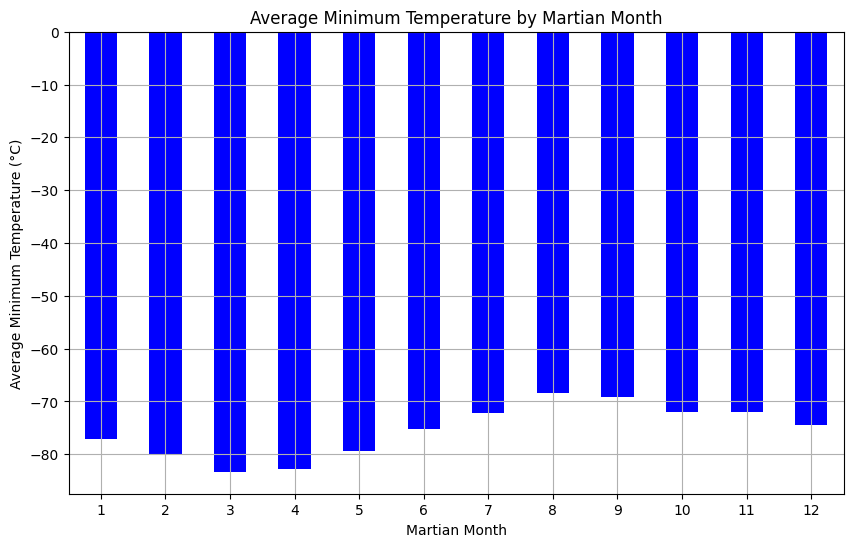

In [236]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Coldest month: 3 with an average temperature of -83.30729166666667
Warmest month: 8 with an average temperature of -68.38297872340425


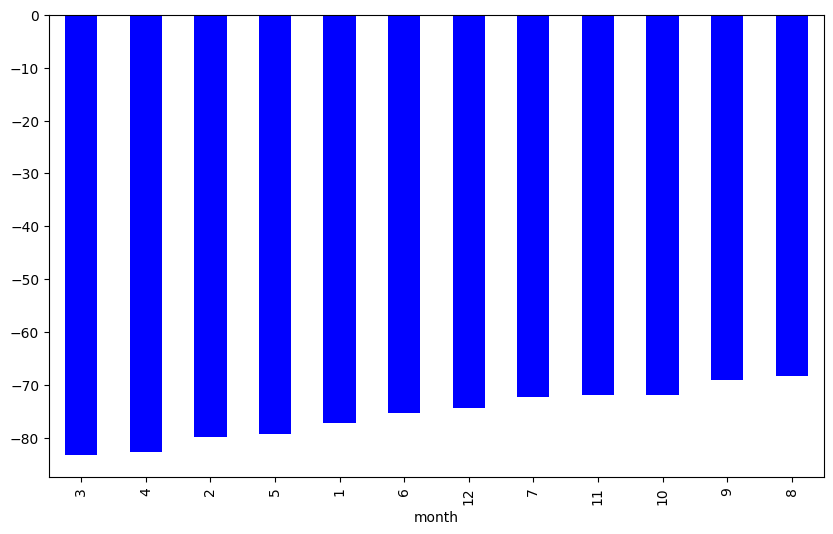

In [237]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp_by_month = avg_temp_by_month.sort_values()

plt.figure(figsize=(10, 6))
sorted_avg_temp_by_month.plot(kind='bar', color='blue')
print(f"Coldest month: {coldest_month} with an average temperature of {coldest_month_temp}")
print(f"Warmest month: {warmest_month} with an average temperature of {warmest_month_temp}")


In [238]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


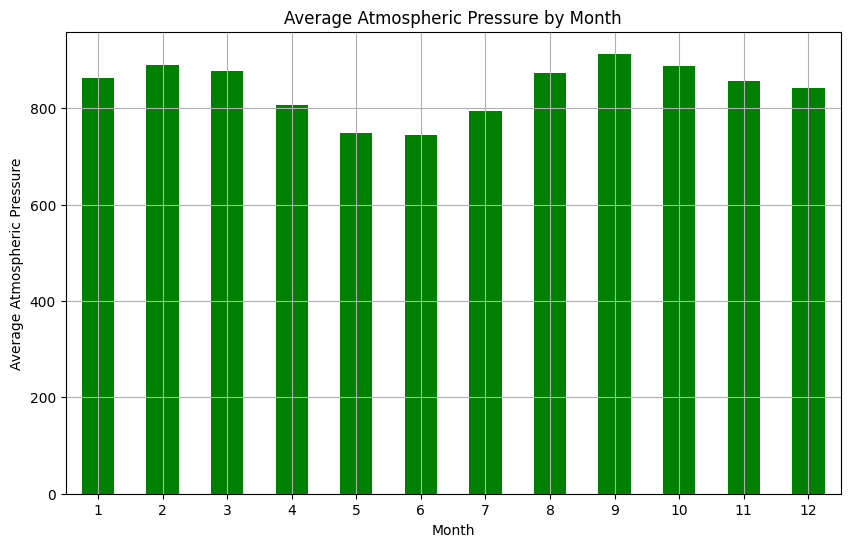

In [239]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='green')
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


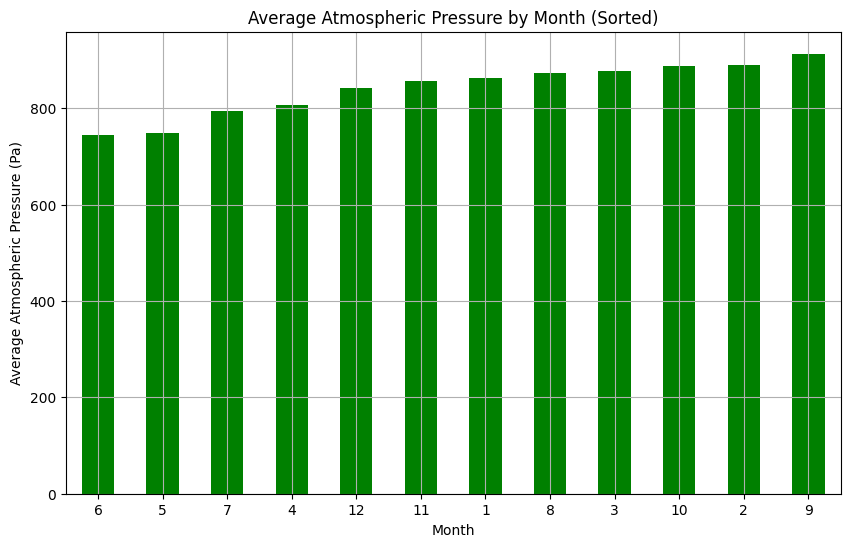

Month with the lowest pressure: 6 with an average pressure of 745.0544217687075
Month with the highest pressure: 9 with an average pressure of 913.3059701492538


In [240]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()
plt.figure(figsize=(10, 6))
sorted_avg_pressure_by_month.plot(kind='bar', color='green')
plt.title('Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

lowest_pressure_month = sorted_avg_pressure_by_month.idxmin()
highest_pressure_month = sorted_avg_pressure_by_month.idxmax()

lowest_pressure_value = sorted_avg_pressure_by_month[lowest_pressure_month]
highest_pressure_value = sorted_avg_pressure_by_month[highest_pressure_month]

print(f"Month with the lowest pressure: {lowest_pressure_month} with an average pressure of {lowest_pressure_value}")
print(f"Month with the highest pressure: {highest_pressure_month} with an average pressure of {highest_pressure_value}")

Total number of Earth days in the dataset covering a full Martian year: 2021
Estimated number of Earth days in a Martian year: 705.86


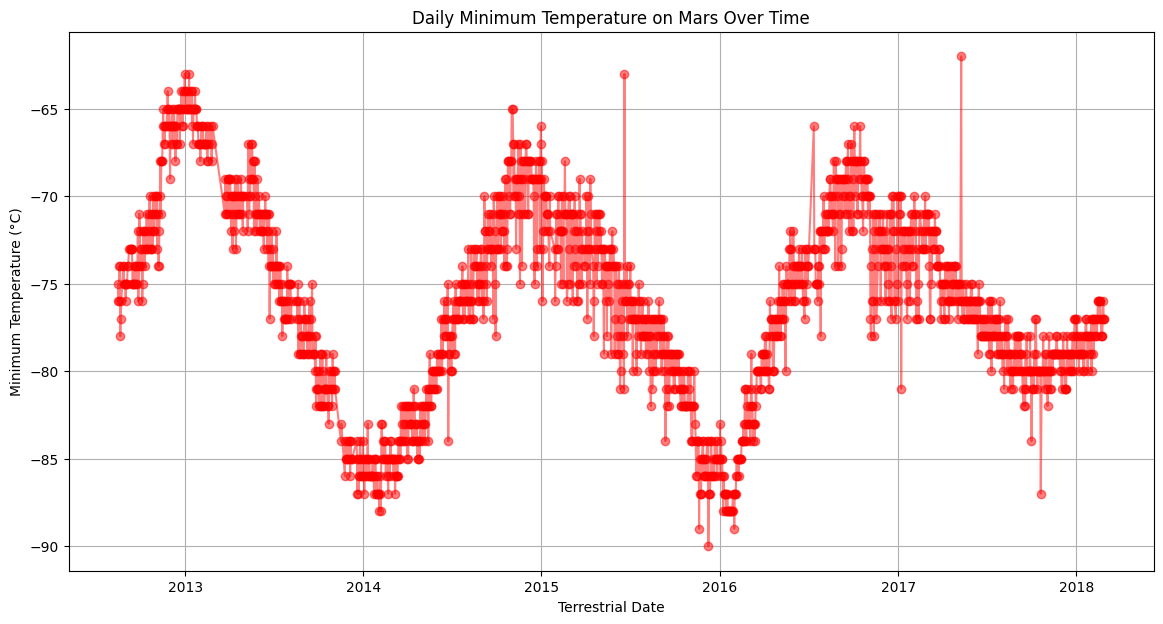

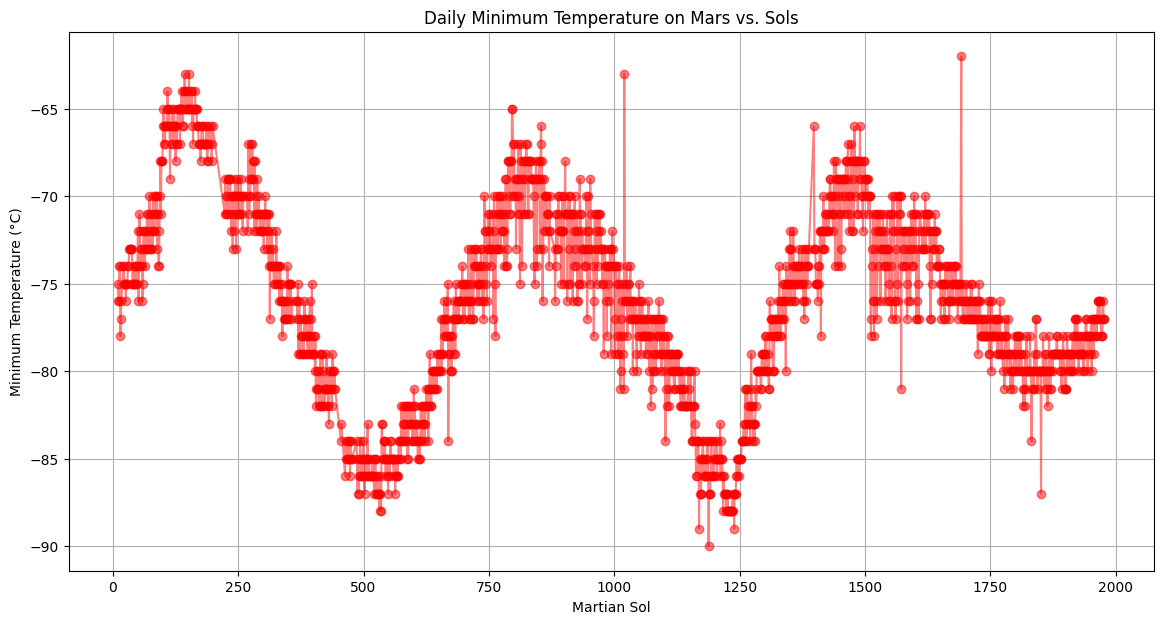

In [241]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
df_sorted = df.sort_values('terrestrial_date')
months = df_sorted['month'].unique()
months.sort()
start_date = None
end_date = None
months = df_sorted['month'].unique()
months.sort()

# Initialize variables to track full Martian year data
start_date = None
end_date = None

for i in range(len(months) - 11):  # Ensure there's room for a full year of 12 months
    start_month = months[i]
    end_month = months[i + 11]
    
    # Filter data for these months
    df_year = df_sorted[(df_sorted['month'] >= start_month) & (df_sorted['month'] <= end_month)]
    
    if not df_year.empty:
        start_date = df_year['terrestrial_date'].min()
        end_date = df_year['terrestrial_date'].max()
        num_sols = df_year['sol'].max() - df_year['sol'].min()
        break

# Calculate Earth days and sols for a full Martian year
if start_date and end_date:
    total_earth_days = (end_date - start_date).days
    # Use the known length of a Martian year (687 Earth days) for comparison
    martian_year_length_days = (total_earth_days / num_sols) * 687
    print(f"Total number of Earth days in the dataset covering a full Martian year: {total_earth_days}")
    print(f"Estimated number of Earth days in a Martian year: {martian_year_length_days:.2f}")
else:
    print("Unable to find a full Martian year in the dataset.")
    
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(14, 7))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='red', alpha=0.5)
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['sol'], df['min_temp'], marker='o', linestyle='-', color='red', alpha=0.5)
plt.title('Daily Minimum Temperature on Mars vs. Sols')
plt.xlabel('Martian Sol')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

#### Minimum Temperature
minimum temperature is of -90 degrees and temperatures drop aproximately every 6t00 sols or ever 2 years aproximately

#### Atmospheric Pressure

Pressure drops during June.

#### Year Length

There are aproximately 700 earth days in a martian year

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [242]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

# Close the browser
